<a href="https://colab.research.google.com/github/klklgooa/MachineLearning/blob/main/5_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

과제:  제목 과제1로 깃 업로드

시험: 10월 16일 11시. 시험 2시간
코딩: 빠진 요구사항도 손코딩. 최대 3문제, 그래프 분석
이론: 용어 설명(객관식)


배운 알고리즘 종류: k최근접이웃분류 및 회귀, 선형회귀, 로지스틱회귀, SGD분류, 결정트리, 랜덤포레스트, 엑스트라트리, 그래디언트 부스팅, 히스토그램기반그래디언트 부스팅

# **실습5**

Wine데이터 세트를 이용하여 결정트리, 랜덤포래스트, 엑스트라 트리, 그래디언트 부스팅, 히스토그램기반 그래디언트 부스팅 모델을 만들고 최적화.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import pandas as pd

# 와인 데이터 읽어 들이기
wine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine_Learning/data/wine+quality/winequality.csv')
wine = wine.fillna(0) #Nan 값을 0으로 바꾸기.
data = wine[['alcohol', 'residual sugar', 'pH']].to_numpy() #데이터프레임을 넘파이로 바꿈.
target = wine['class'].to_numpy()
print(wine)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4              0.70         0.00             1.9      0.076   
1              7.8              0.88         0.00             2.6      0.098   
2              7.8              0.76         0.04             2.3      0.092   
3             11.2              0.28         0.56             1.9      0.075   
4              7.4              0.70         0.00             1.9      0.076   
...            ...               ...          ...             ...        ...   
6493           6.6              0.32         0.36             8.0      0.047   
6494           6.5              0.24         0.19             1.2      0.041   
6495           5.5              0.29         0.30             1.1      0.022   
6496             6              0.21         0.38             0.8      0.020   
6497                           0.00         0.00             0.0      0.000   

      free sulfur dioxide  total sulfur

In [41]:
wine.head() # head() 5개까지의 데이터 보여줌. 0이면 레드, 1이면 화이트와인

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0,0.0


In [42]:
wine.info() #누락값이있다면 그 데이터를 버리거나 평균값을 넣을 수 있음. 어떤 방식이 최선인지는 미리 알기 어려움
#누락값이 있는 경우 데이터 사용 경우497개의 평균값을 넣거나, 6497 중 6000개만 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6498 entries, 0 to 6497
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6498 non-null   object 
 1   volatile acidity      6498 non-null   float64
 2   citric acid           6498 non-null   float64
 3   residual sugar        6498 non-null   float64
 4   chlorides             6498 non-null   float64
 5   free sulfur dioxide   6498 non-null   float64
 6   total sulfur dioxide  6498 non-null   float64
 7   density               6498 non-null   float64
 8   pH                    6498 non-null   float64
 9   sulphates             6498 non-null   float64
 10  alcohol               6498 non-null   float64
 11  quality               6498 non-null   float64
 12  class                 6498 non-null   float64
dtypes: float64(12), object(1)
memory usage: 660.1+ KB


In [43]:
wine.describe() #갯수, 평균, 표준편차, 최소값, 1사분위수, 2사분위수(중간값), 3사분위수, 최대값

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
count,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000,6498.000000
mean,0.339614,0.318584,5.442398,0.056025,30.520622,115.726762,0.994544,3.218006,0.531187,10.490186,5.817482,0.753770
std,0.164678,0.145360,4.757917,0.035038,17.752073,56.535741,0.012699,0.165658,0.148940,1.199701,0.876166,0.430847
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [44]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    data, target, test_size=0.2, random_state=42) #stratify=target

In [45]:
print(train_input.shape, test_input.shape)

(5198, 3) (1300, 3)


In [46]:
from sklearn.preprocessing import StandardScaler #표준화.

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input) #훈련데이터를 기준으로 두고 모든 데이터를 변환.

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target)) #과소적합.

0.9967295113505195
0.8646153846153846


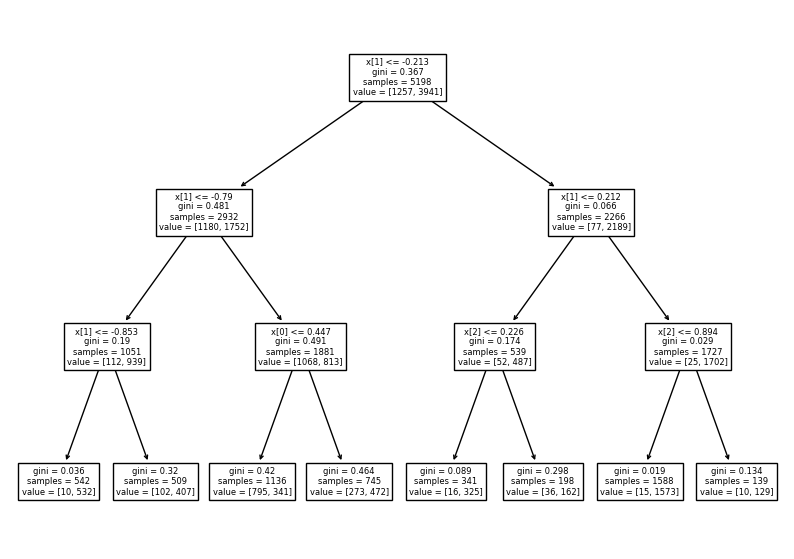

In [48]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

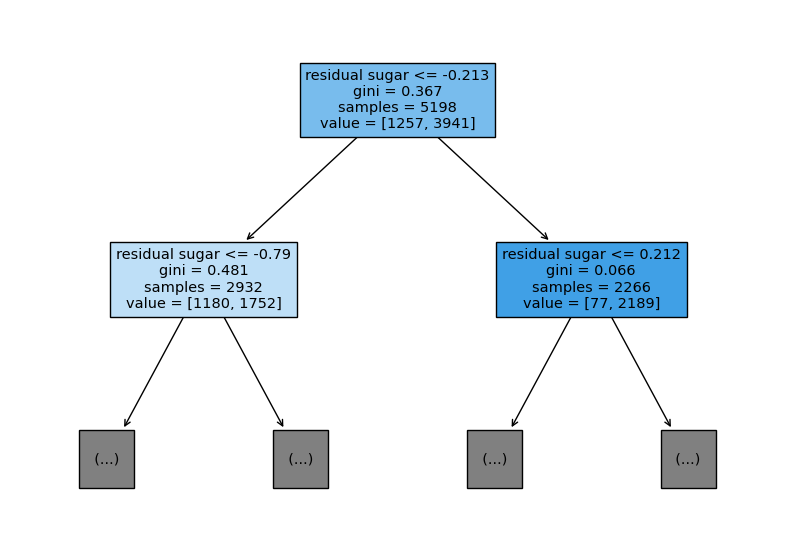

In [55]:
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'residual sugar', 'pH'])  #max_depth 트리 레벨
plt.show()

In [50]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.845517506733359
0.8369230769230769


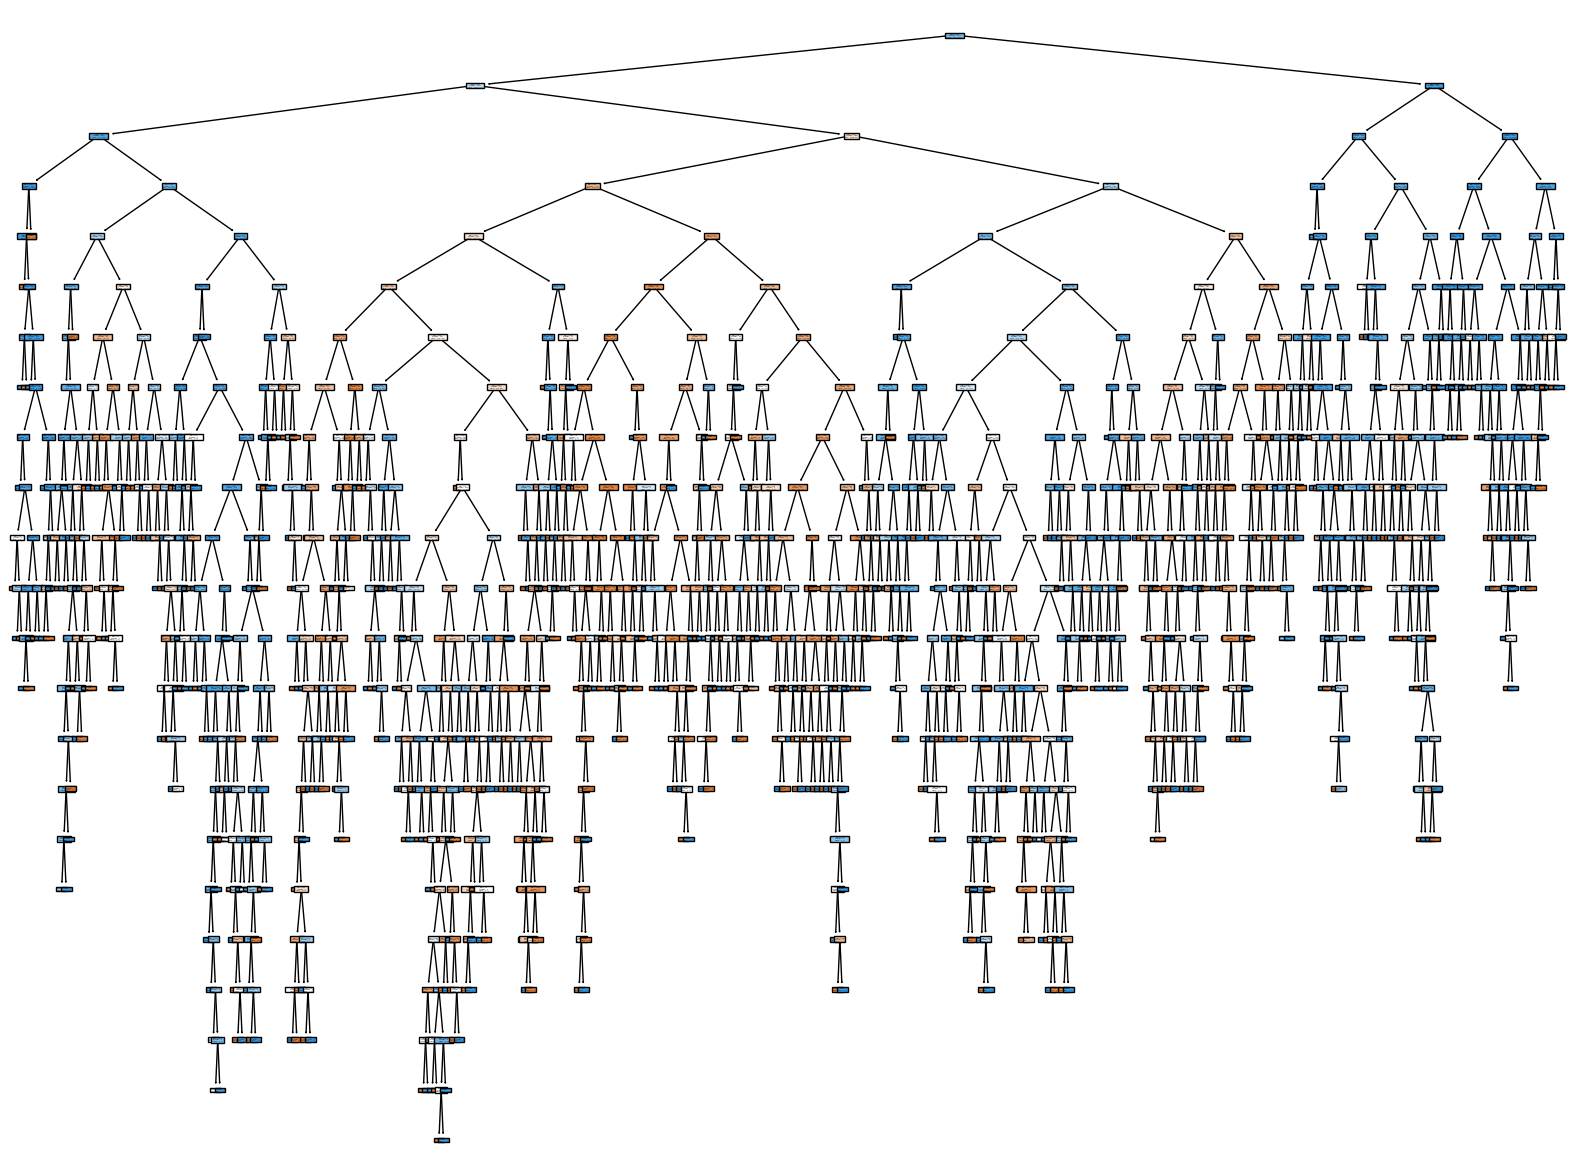

In [56]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'residual sugar', 'pH'])
plt.show()

In [57]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target) #정규화 안된 값.

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.845517506733359
0.8369230769230769


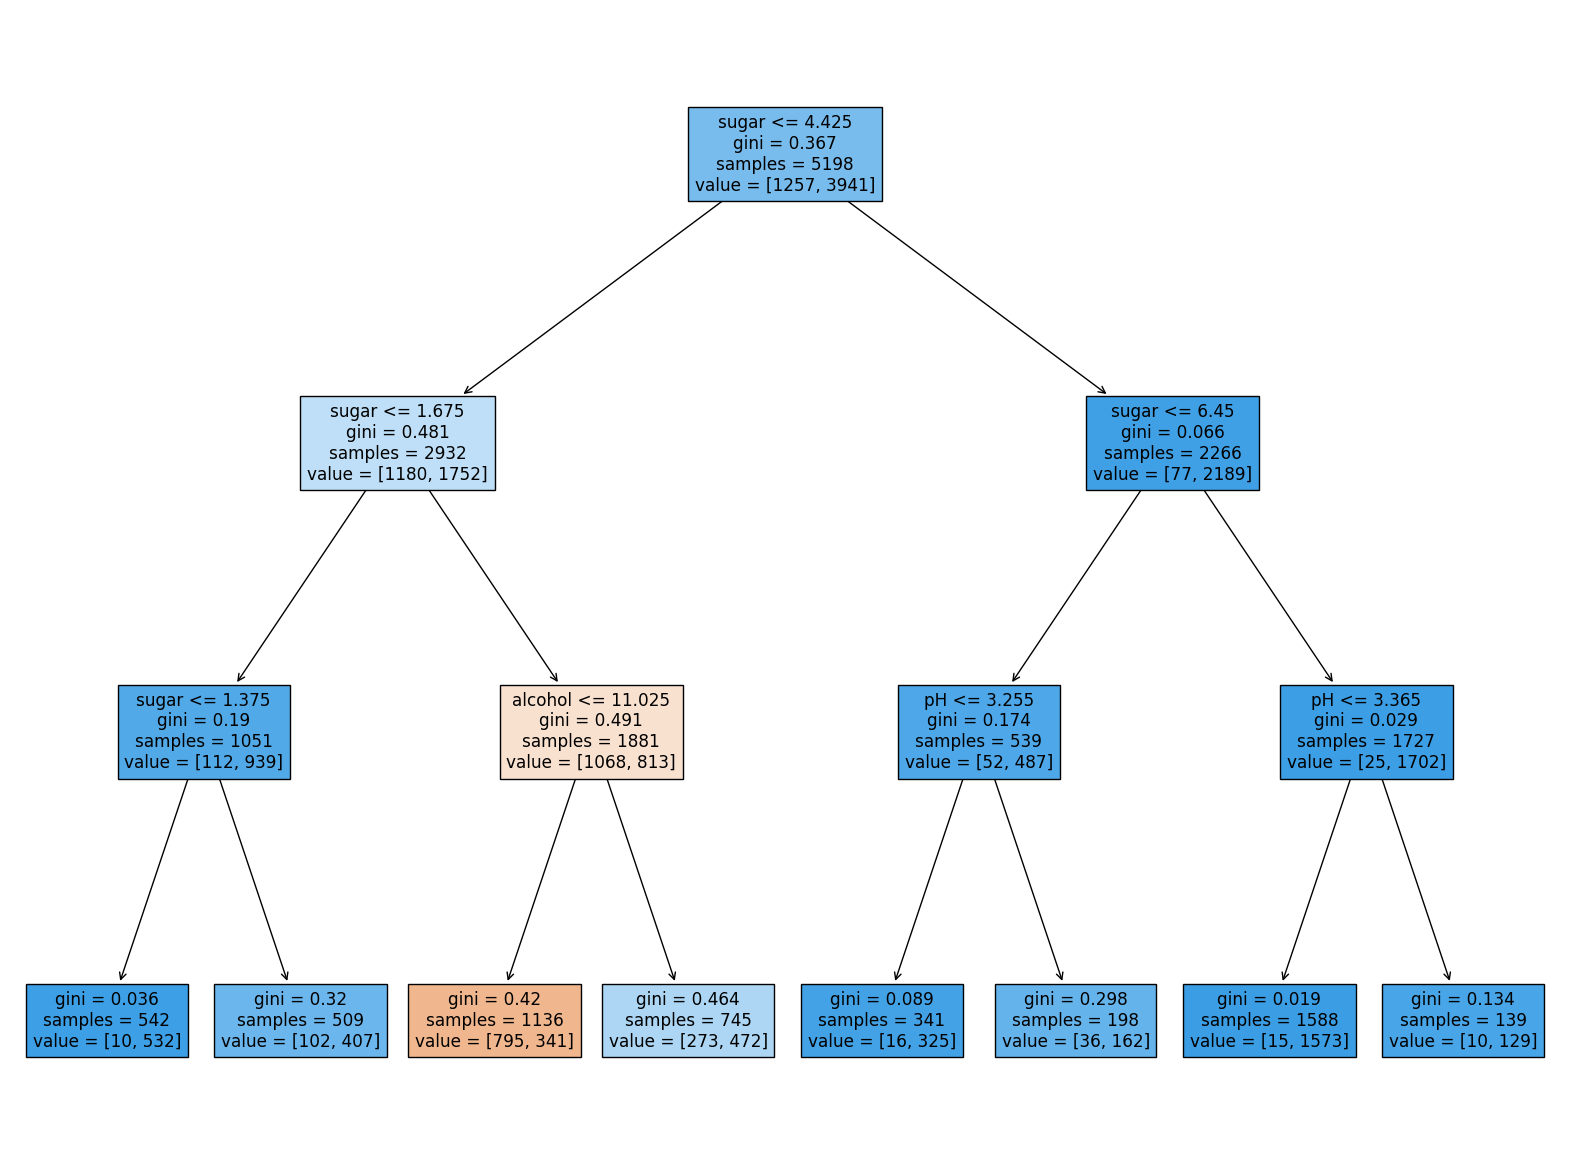

In [58]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [59]:
print(dt.feature_importances_) #속성 출력 , 중요도를 백분율로 알콜, 당도, ph 출력. 당도가 제일 중요

[0.13117923 0.86153158 0.0072892 ]


# **랜덤 포레스트**

In [61]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(rf, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9970180630195056 0.8893799511364477


In [62]:
rf.fit(train_input, train_target)
print(rf.feature_importances_) #특성 중요도 출력, 특성중요도 일부 상승 하나의 특성에 과도하게 집중되지 않음.

[0.22943535 0.49793257 0.27263208]


In [63]:
rf = RandomForestClassifier(oob_score=True, n_jobs=-1, random_state=42)

rf.fit(train_input, train_target)
print(rf.oob_score_)

0.8928434013081955


In [66]:
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.9967295113505195
0.8961538461538462


# **엑스트라트리**

In [64]:
from sklearn.ensemble import ExtraTreesClassifier

et = ExtraTreesClassifier(n_jobs=-1, random_state=42)
scores = cross_validate(et, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9972104516466143 0.8859174872288443


In [65]:
et.fit(train_input, train_target)
print(et.feature_importances_)

[0.19347937 0.51869773 0.2878229 ]


In [67]:
print(et.score(train_input, train_target))
print(et.score(test_input, test_target))

0.9967295113505195
0.8869230769230769


# **그레이디언트 부스팅**

In [68]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.8852441913033401 0.8703301991559933


In [69]:
gb = GradientBoostingClassifier(n_estimators=500, learning_rate=0.2, random_state=42)
scores = cross_validate(gb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9426702708741661 0.8774498408232768


In [70]:
gb.fit(train_input, train_target)
print(gb.feature_importances_)

[0.16198179 0.67503744 0.16298077]


In [75]:
print(gb.score(train_input, train_target))
print(gb.score(test_input, test_target))

0.9363216621777607
0.8823076923076923


# **히스토그램 기반 부스팅**

In [71]:
from sklearn.ensemble import HistGradientBoostingClassifier

hgb = HistGradientBoostingClassifier(random_state=42)
scores = cross_validate(hgb, train_input, train_target, return_train_score=True, n_jobs=-1)

print(np.mean(scores['train_score']), np.mean(scores['test_score']))

0.9312234887373142 0.8789879321833123


In [72]:
from sklearn.inspection import permutation_importance
#특성을 하나씩랜덤하게 섞어서 모델의 성능 변화를 관찰하여 어떤 특성이 중요한지 계산함

hgb.fit(train_input, train_target)
result = permutation_importance(hgb, train_input, train_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.09597922 0.23701424 0.08655252]


In [73]:
result = permutation_importance(hgb, test_input, test_target, n_repeats=10,
                                random_state=42, n_jobs=-1)
print(result.importances_mean)

[0.05823077 0.20692308 0.04815385]


In [74]:
hgb.score(test_input, test_target)

0.8761538461538462

In [76]:
print(hgb.score(train_input, train_target))
print(hgb.score(test_input, test_target))

0.9274721046556368
0.8761538461538462
